In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import yfinance as yf
%matplotlib inline

In [144]:
DUOL_df = yf.download('DUOL')

[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': "DUOL's stock price"}, xlabel='Date'>

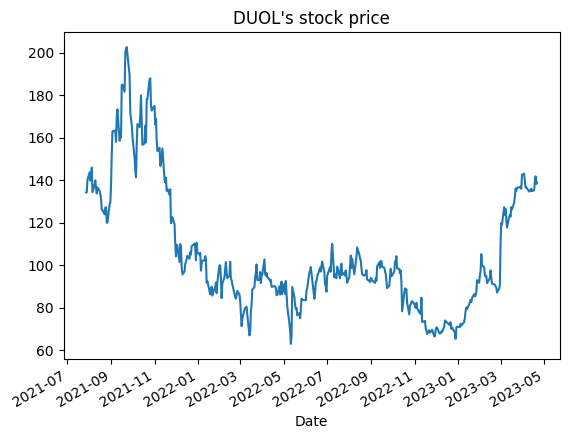

In [145]:
DUOL_df['Close'].plot(title="DUOL's stock price")

In [146]:
DUOL_df = yf.download('DUOL')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [147]:
log_returns = np.log(1+DUOL_df.pct_change())

In [148]:
log_returns.tail() 

Date
2023-04-17    0.003035
2023-04-18    0.027840
2023-04-19    0.019573
2023-04-20   -0.025990
2023-04-21    0.005770
Name: Adj Close, dtype: float64

<Axes: xlabel='Date'>

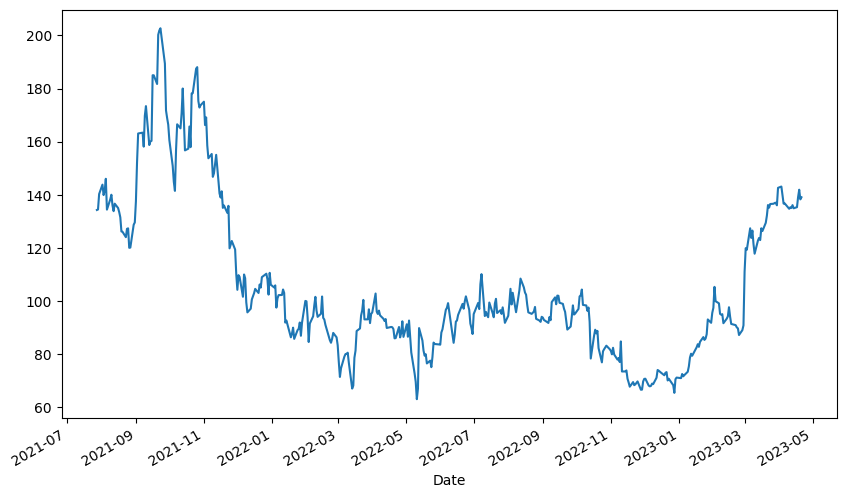

In [149]:
DUOL_df.plot(figsize=(10,6))

<Axes: xlabel='Date'>

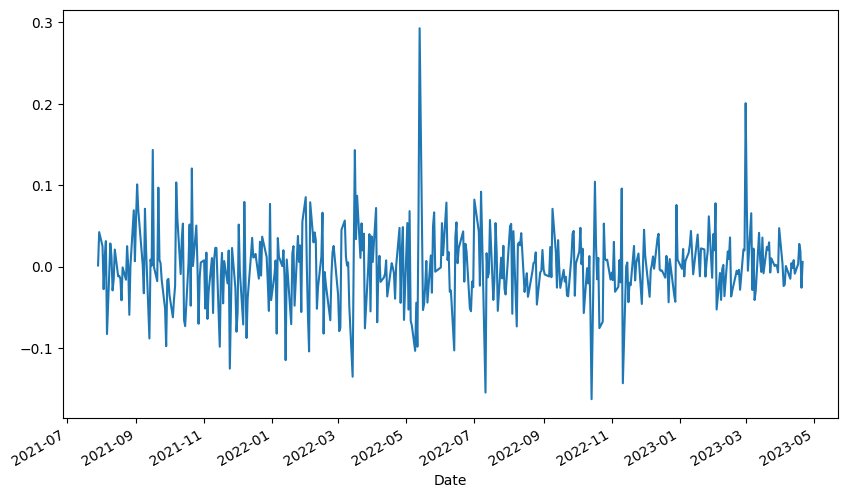

In [150]:
log_returns.plot(figsize=(10,6))

In [151]:
duol_ret_mean = log_returns.mean() 
print (duol_ret_mean * 100,'%')

0.008032247756145128 %


In [152]:
var = log_returns.var()
var

0.002206061381698947

Drift = duol_ret_mean - 1/2 * var

In [153]:
drift = duol_ret_mean - (0.5 * var)

In [154]:
stdev = log_returns.std()

In [155]:
np.array(drift)

array(-0.00102271)

In [156]:
norm.ppf(0.95)

1.6448536269514722

Create Multi dimensinal Array

In [157]:
random_array = np.random.rand(10,2)
random_array 

array([[0.14729941, 0.88437154],
       [0.56635435, 0.49340428],
       [0.04908205, 0.29912363],
       [0.36555179, 0.11409473],
       [0.18363773, 0.25207668],
       [0.81121944, 0.2330207 ],
       [0.37323623, 0.11976212],
       [0.64940958, 0.21547427],
       [0.89480827, 0.66013484],
       [0.11062981, 0.79219454]])

In [158]:
norm.ppf(random_array)

array([[-1.04808634,  1.19712735],
       [ 0.16710008, -0.01653378],
       [-1.65381991, -0.52692272],
       [-0.34365789, -1.20503587],
       [-0.90158859, -0.66796903],
       [ 0.88239892, -0.72893503],
       [-0.32329419, -1.17617679],
       [ 0.38372693, -0.78756952],
       [ 1.25251174,  0.41283116],
       [-1.22318557,  0.81405941]])

In [159]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.56549147, -1.17046935],
       [-0.03244883, -2.96844587],
       [-1.38681458, -0.10231172],
       [ 0.97324528, -1.33299383],
       [-2.33980211,  0.68198367],
       [ 0.47540416, -1.40148533],
       [ 0.11112803, -0.20856722],
       [ 0.40073382,  0.50511696],
       [ 1.64376178,  0.10529137],
       [-0.14284077, -0.45409105]])

Intervals = 1000, because forecasting stock prices for the upcoming 1000 days
iterations = 10, because we ask the computer to produse ten series of future stock prices predictions

In [160]:
t_interval = 1000
iteratioons = 10

daily_returns = e^r,     r = log(return)
r = drift + stdev * z

In [161]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_interval, iteratioons)))

In [162]:
daily_returns

array([[1.06131422, 1.00755619, 1.01028042, ..., 1.03094792, 0.92762499,
        0.99743201],
       [0.91734744, 1.00647913, 1.0004898 , ..., 1.09213233, 0.98080259,
        1.00711044],
       [0.97794508, 1.03885157, 1.06579299, ..., 0.92407652, 1.01651447,
        1.01324193],
       ...,
       [0.94321884, 0.99703077, 0.9263707 , ..., 1.01128969, 1.09534579,
        0.96358703],
       [1.08779187, 0.99903   , 1.03169568, ..., 1.04421856, 1.03374312,
        1.04742061],
       [1.06078669, 1.06214684, 1.04935218, ..., 0.92174617, 0.99882185,
        1.11150017]])

S0 = τελευταία τιμή

In [163]:
S0 = DUOL_df.iloc[-1]
S0

139.0399932861328

In [164]:
DUOL_df.tail(1)

Date
2023-04-21    139.039993
Name: Adj Close, dtype: float64

In [165]:
price_list = np.zeros_like(daily_returns)

In [166]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Θέτω την 1η σειρά ίση με S0

In [167]:
price_list[0] = S0
price_list

array([[139.03999329, 139.03999329, 139.03999329, ..., 139.03999329,
        139.03999329, 139.03999329],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [168]:
for t in range(1, t_interval):
    price_list[t] = price_list[t-1] * daily_returns[t]
    
price_list

array([[139.03999329, 139.03999329, 139.03999329, ..., 139.03999329,
        139.03999329, 139.03999329],
       [127.54798247, 139.94085098, 139.10809503, ..., 151.85007171,
        136.37078604, 140.02862816],
       [124.73492149, 145.37777276, 148.26043293, ..., 140.32108605,
        138.62287677, 141.88287724],
       ...,
       [ 98.46043676, 274.00970356,  18.926152  , ...,  34.23958787,
        214.88005309, 372.80732616],
       [107.10446216, 273.74391518,  19.52602925, ...,  35.75361307,
        222.13077735, 390.48607875],
       [113.61498752, 290.75623558,  20.48968127, ...,  32.95575608,
        221.86907454, 434.02534284]])

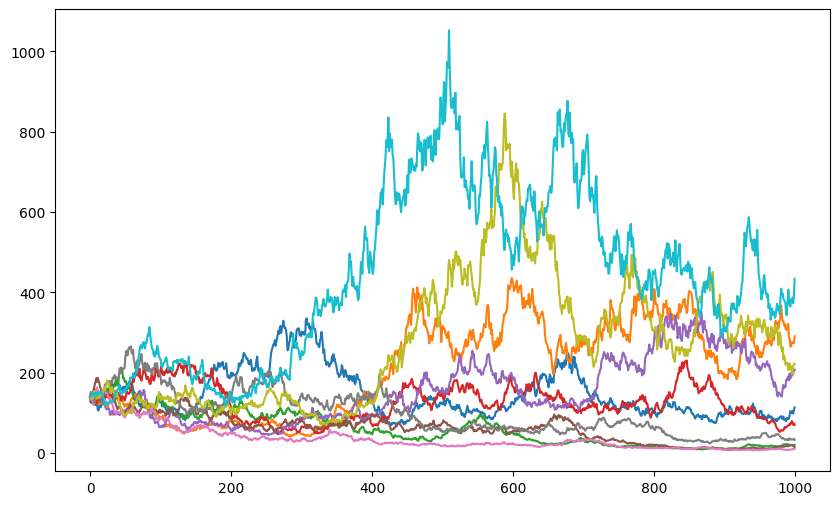

In [169]:
plt.figure(figsize=(10,6))
plt.plot(price_list);